# Importing Libraries

In [2]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

TypeError: Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

# Loading Model

In [3]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

#Visualising and Performing Prediction on Single image

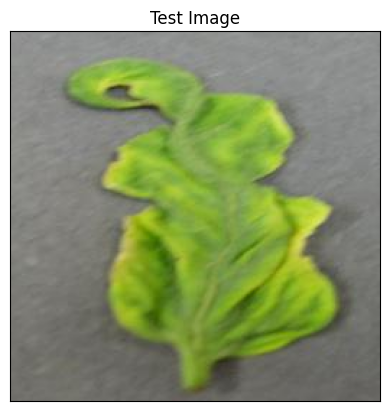

In [16]:
# Test Image Visualization
import cv2
import matplotlib.pyplot as plt
import os

image_path = 'test/TomatoYellowCurlVirus5.JPG'

# Check if the image exists
if not os.path.exists(image_path):
    print(f"Error: Image not found at path '{image_path}'")
else:
    # Reading the image
    img = cv2.imread(image_path)
    
    # Convert from BGR (OpenCV default) to RGB (for matplotlib)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display the image
    plt.imshow(img)
    plt.title('Test Image')
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.show()


## Testing Model

In [17]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 24ms/step


In [18]:
print(predictions)

[[2.5748580e-14 5.9876177e-17 2.2049147e-10 2.0628684e-14 3.5358577e-14
  1.9189351e-15 2.6829827e-16 3.0862604e-14 1.3486820e-16 1.0987783e-15
  5.5395870e-16 1.6554503e-11 6.2677690e-13 3.8309612e-11 7.2363421e-14
  7.8610485e-13 3.1937674e-13 4.5499291e-17 1.6467692e-13 7.2203901e-14
  4.1327458e-19 3.3685552e-15 1.1600416e-14 5.8242820e-12 1.6271556e-13
  2.0346001e-11 1.2387657e-12 6.0156462e-15 4.8641245e-06 1.8540167e-07
  2.6974131e-11 1.6396086e-12 1.8709418e-09 2.4071824e-11 8.1574036e-10
  9.9999499e-01 1.9657317e-10 3.1463945e-13]]


In [19]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

35


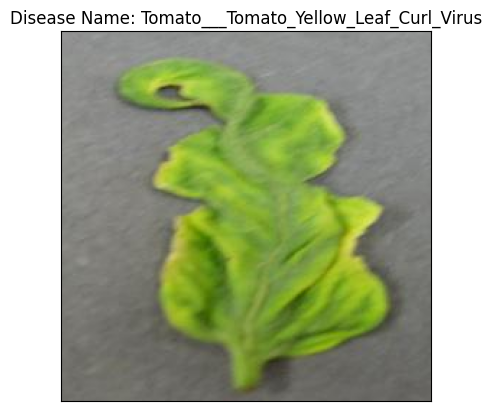

In [20]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()